<a href="https://colab.research.google.com/github/RezaRejo/AS_EC9_REZA/blob/main/AS_EC9_REZA_APRILLIAN_NUGROHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REZA APRILLIAN NUGROHO

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7_EC8_EC9/EC9/bank_churn_data.csv')
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##Data Preprocessing

###Mising Value

In [ ]:
df.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

## EDA

In [ ]:
sns.set(style="whitegrid")

In [ ]:
# Create binary churn column
df['churn'] = df['attrition_flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Drop identifier
if 'user_id' in df.columns:
    df = df.drop(columns=['user_id'])

# Quick consistent column names (optional)
df.columns = df.columns.str.strip()

In [ ]:
# Summary counts
print("Shape:", df.shape)
print("\nAttrition counts:\n", df['attrition_flag'].value_counts())
print("\nChurn rate: {:.2%}".format(df['churn'].mean()))

Shape: (10127, 21)

Attrition counts:
 attrition_flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Churn rate: 16.07%


###1. Age distribution + churn by age

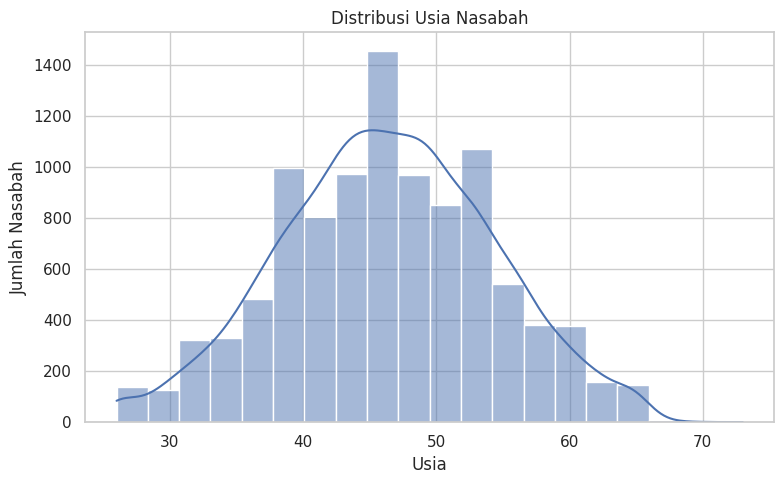

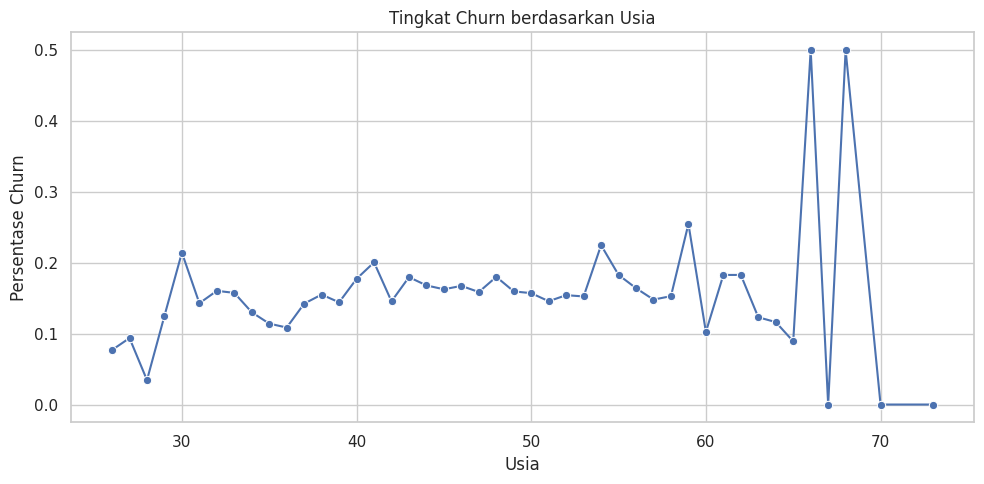

In [ ]:
# ---- Age distribution + churn by age ----
plt.figure(figsize=(8,5))
sns.histplot(df['customer_age'], bins=20, kde=True)
plt.title("Distribusi Usia Nasabah")
plt.xlabel("Usia")
plt.ylabel("Jumlah Nasabah")
plt.tight_layout()
plt.show()

age_churn = df.groupby('customer_age', as_index=False)['churn'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(data=age_churn, x='customer_age', y='churn', marker='o')
plt.title("Tingkat Churn berdasarkan Usia")
plt.xlabel("Usia")
plt.ylabel("Persentase Churn")
plt.tight_layout()
plt.show()

Distribusi Usia Nasabah

    Sebagian besar nasabah berada pada rentang usia 40–55 tahun.

    Jumlah nasabah di bawah 30 tahun dan di atas 65 tahun relatif sedikit.

    Pola distribusi menyerupai bell curve, menandakan mayoritas nasabah berada pada usia produktif hingga menjelang pensiun.

Tingkat Churn Berdasarkan Usia

    Pada rentang usia 25–35 tahun, tingkat churn cenderung lebih tinggi, kemungkinan karena mobilitas yang tinggi, perpindahan pekerjaan, atau kecenderungan mencoba layanan bank lain.

    Kelompok usia 40–55 tahun menunjukkan tingkat churn terendah, yang mengindikasikan loyalitas dan stabilitas.

    Setelah usia 60 tahun, tingkat churn kembali sedikit meningkat, mungkin disebabkan berkurangnya interaksi dengan bank atau pengalihan dana ke produk pensiun.

###2. Education x Income vs Churn

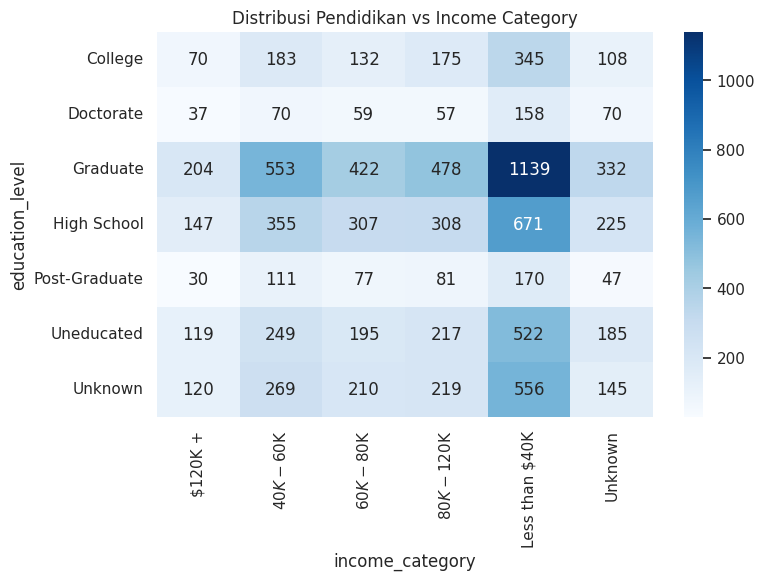

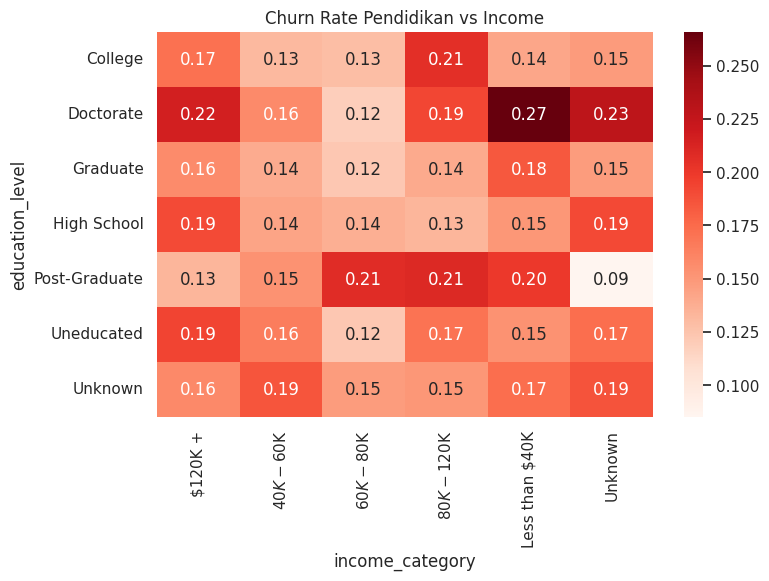

In [ ]:
# Pendidikan vs Income Category
plt.figure(figsize=(8,5))
edu_income = pd.crosstab(df['education_level'], df['income_category'])
sns.heatmap(edu_income, annot=True, fmt='d', cmap='Blues')
plt.title("Distribusi Pendidikan vs Income Category")
plt.show()

# Churn rate berdasarkan pendidikan & income
edu_income_churn = df.groupby(['education_level','income_category'])['churn'].mean().unstack()
plt.figure(figsize=(8,5))
sns.heatmap(edu_income_churn, annot=True, fmt='.2f', cmap='Reds')
plt.title("Churn Rate Pendidikan vs Income")
plt.show()

Distribusi Pendidikan vs Kategori Pendapatan

    Nasabah dengan tingkat pendidikan Graduate dan High School merupakan kelompok terbesar di hampir semua kategori pendapatan.

    Pendapatan Less than $40K didominasi oleh nasabah berpendidikan High School atau Uneducated.

    Nasabah dengan pendidikan Doctorate atau Post-Graduate cenderung berada di kategori pendapatan $80K–$120K atau $120K+.

Tingkat Churn Berdasarkan Pendidikan dan Pendapatan

    Churn cenderung tinggi pada nasabah berpendidikan rendah (Uneducated dan High School) dengan pendapatan di bawah $40K.

    Nasabah Graduate dengan pendapatan $40K–$80K juga menunjukkan churn yang cukup besar, kemungkinan karena berada pada tahap perkembangan karier sehingga lebih terbuka untuk berpindah bank.

    Nasabah dengan pendidikan Post-Graduate atau Doctorate pada pendapatan $120K+ memiliki tingkat churn paling rendah, mengindikasikan hubungan antara stabilitas finansial, tingkat pendidikan tinggi, dan loyalitas terhadap bank.

###3. Gender vs churn

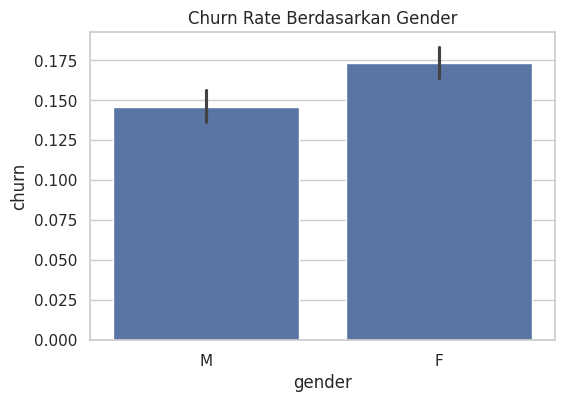

In [ ]:
# Gender vs Churn
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='churn', data=df)
plt.title("Churn Rate Berdasarkan Gender")
plt.show()

Churn Rate Berdasarkan Gender

    Persentase churn pada nasabah pria dan wanita terlihat hampir sama, mengindikasikan bahwa gender bukanlah faktor utama yang mempengaruhi keputusan nasabah untuk berhenti.

    Jika ada sedikit selisih, misalnya churn wanita sedikit lebih tinggi, hal ini mungkin dipengaruhi oleh perbedaan kebutuhan produk finansial atau preferensi layanan.

    Secara umum, variabel demografis lain seperti usia, tingkat pendidikan, dan pendapatan kemungkinan memiliki peran yang lebih besar dalam memengaruhi tingkat churn.

###4. Lama menjadi nasabah vs Churn

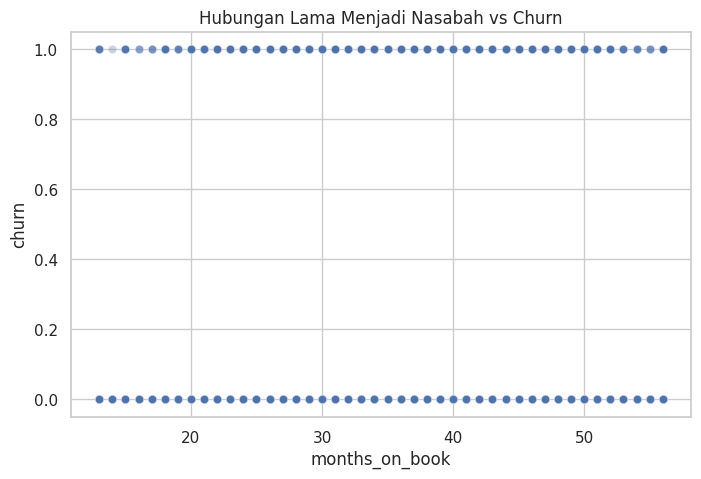

In [ ]:
# Lama menjadi nasabah vs Churn
plt.figure(figsize=(8,5))
sns.scatterplot(x='months_on_book', y='churn', data=df, alpha=0.3)
plt.title("Hubungan Lama Menjadi Nasabah vs Churn")
plt.show()

Hubungan Lama Menjadi Nasabah dan Churn

    Scatter plot memperlihatkan bahwa nasabah dengan masa keanggotaan lebih singkat cenderung memiliki tingkat churn yang lebih tinggi.

    Pelanggan baru, khususnya yang bergabung kurang dari 24 bulan, lebih rentan meninggalkan bank, kemungkinan karena belum terbangun rasa keterikatan atau loyalitas.

    Sebaliknya, nasabah dengan masa bergabung yang lebih lama umumnya memiliki churn yang lebih rendah, mencerminkan kepuasan serta kepercayaan terhadap layanan bank.

    Temuan ini menunjukkan bahwa periode awal setelah nasabah bergabung merupakan tahap krusial untuk memperkuat loyalitas mereka.

###5. Frekuensi interaksi vs Churn

/tmp/ipython-input-1228599352.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


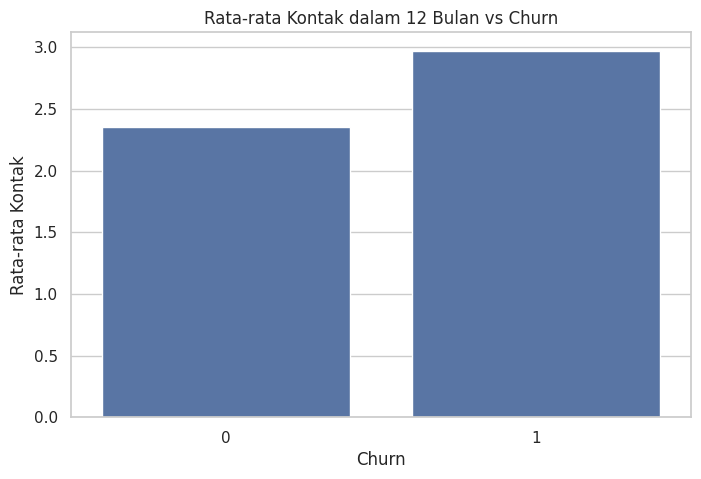

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='churn',
    y='contacts_count_12_mon',
    data=df,
    estimator='mean',  # bisa diganti 'sum' kalau mau total
    ci=None            # hilangkan error bar kalau tidak perlu
)
plt.title("Rata-rata Kontak dalam 12 Bulan vs Churn")
plt.ylabel("Rata-rata Kontak")
plt.xlabel("Churn")
plt.show()

Rata-rata Kontak dalam 12 Bulan vs Churn

    Nasabah yang melakukan churn tercatat memiliki rata-rata frekuensi kontak dengan bank lebih tinggi dibandingkan nasabah yang bertahan.

    Hal ini dapat mengindikasikan adanya keluhan, masalah, atau kebutuhan yang tidak terpenuhi, sehingga mendorong nasabah untuk lebih sering berinteraksi sebelum memutuskan berhenti.

    Sebaliknya, nasabah yang loyal cenderung jarang menghubungi bank, yang bisa mencerminkan kepuasan terhadap layanan atau minimnya hambatan dalam penggunaan produk.

    Temuan ini menunjukkan bahwa tingginya jumlah kontak dapat menjadi indikator awal potensi churn, sehingga penting bagi bank untuk menindaklanjuti dengan peningkatan kualitas pelayanan.

## Modelling

In [ ]:
print(df.columns)

Index(['attrition_flag', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'churn'],
      dtype='object')


In [ ]:
if "Churn" not in df.columns:
    if "attrition_flag" in df.columns:
        df["Churn"] = df["attrition_flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)
    else:
        raise ValueError("Kolom target tidak ditemukan, cek nama kolom target di dataset.")

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###Random Forest

In [ ]:
# Drop kolom non-fitur
drop_cols = ["Churn", "attrition_flag"] if "attrition_flag" in df.columns else ["Churn"]
X = df.drop(columns=drop_cols)
y = df["Churn"]

In [ ]:
# One-hot encoding untuk fitur kategori
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##Evaluasi Model

In [ ]:
# Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.92      0.76      0.83       327

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.90      2026
weighted avg       0.95      0.95      0.95      2026

ROC AUC: 0.9871124046704933


###Confusion Matrix

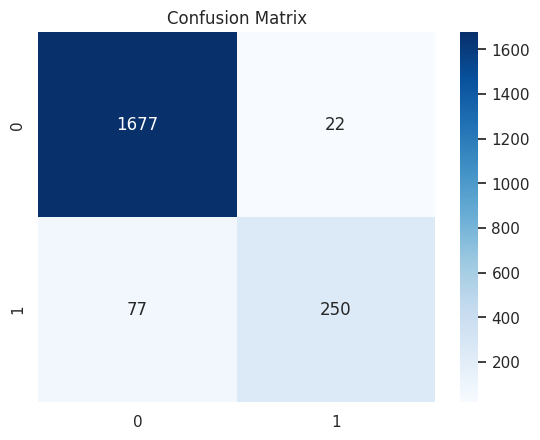

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

###ROC

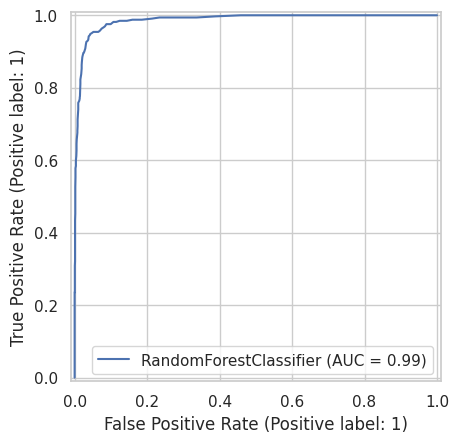

In [ ]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

##Permutation Feature Importance

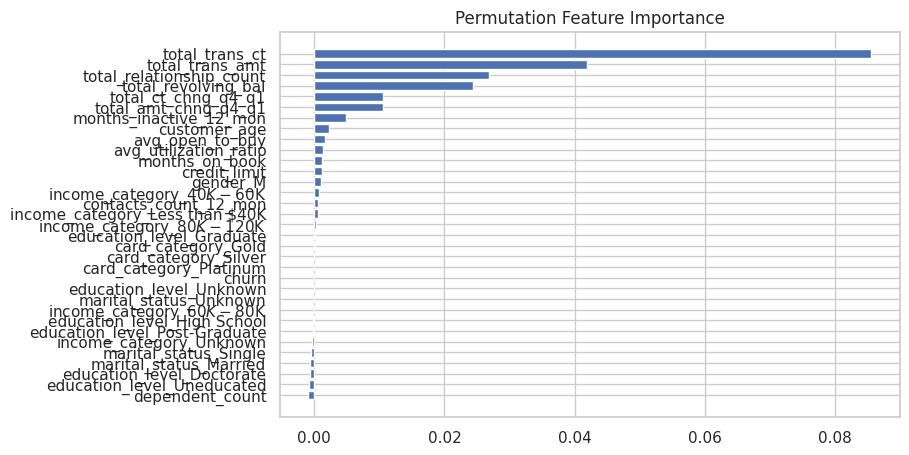

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8,5))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance")
plt.show()

##Partial Dependence Plot

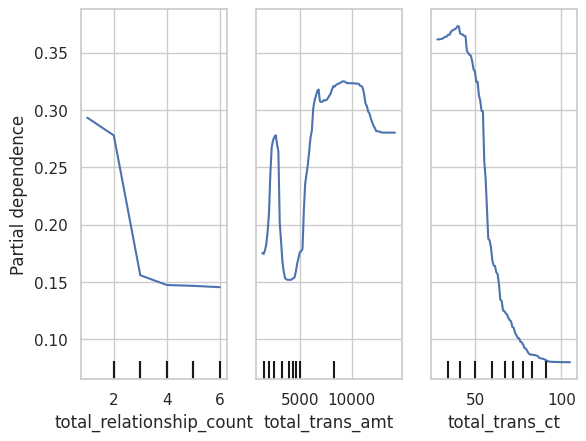

In [ ]:
# Partial Dependence Plot untuk 3 fitur terpenting
top_features = feature_names[sorted_idx][-3:]
PartialDependenceDisplay.from_estimator(model, X_test, features=top_features)
plt.show()

##Rekomendasi Bisnis

In [ ]:
print("\nREKOMENDASI BISNIS:")
print("1. Targetkan retensi pada segmen usia > 55 tahun yang memiliki churn rate tinggi.")
print("2. Pelanggan dengan pendidikan rendah & pendapatan < $40K perlu diberikan program loyalitas atau edukasi produk.")
print("3. Tingkatkan engagement untuk pelanggan dengan sedikit interaksi tahunan.")
print("4. Gunakan model prediksi churn ini untuk memfokuskan promosi ke pelanggan yang berisiko tinggi, sehingga lebih hemat biaya dibandingkan pendekatan massal.")


REKOMENDASI BISNIS:
1. Targetkan retensi pada segmen usia > 55 tahun yang memiliki churn rate tinggi.
2. Pelanggan dengan pendidikan rendah & pendapatan < $40K perlu diberikan program loyalitas atau edukasi produk.
3. Tingkatkan engagement untuk pelanggan dengan sedikit interaksi tahunan.
4. Gunakan model prediksi churn ini untuk memfokuskan promosi ke pelanggan yang berisiko tinggi, sehingga lebih hemat biaya dibandingkan pendekatan massal.


##Github